In [114]:
import pandas as pd

f = pd.read_csv('sales_data.csv',index_col='Transaction Date',parse_dates=True)
df = pd.DataFrame(f)
df

,Products,Currency,Total,Cur Total
Transaction Date,,,,
2023-07-27,DATA ANALYSIS MADE EASY,GBP,8.51,6808.000000
2023-07-26,DATA ANALYSIS MADE EASY,NGN,5500.00,5500.000000
2023-07-25,DATA ANALYSIS MADE EASY,RWF,8397.92,3496.054096
2023-07-25,DATA ANALYSIS MADE EASY,NGN,5500.00,5500.000000
2023-07-22,DATA ANALYSIS MADE EASY,USD,15.00,10500.000000
...,...,...,...,...
2023-04-02,DATA ANALYSIS MADE EASY,NGN,5500.00,5500.000000
2023-03-29,12 Strategies,NGN,6500.00,6500.000000
2023-03-29,12 Strategies,NGN,6500.00,6500.000000


In [115]:
import pandas as pd

f = pd.read_csv('sales_data.csv',index_col='Transaction Date',parse_dates=True)
df = pd.DataFrame(f)

new_data = df[['Products','Cur Total']]
new_data

,Products,Cur Total
Transaction Date,,
2023-07-27,DATA ANALYSIS MADE EASY,6808.000000
2023-07-26,DATA ANALYSIS MADE EASY,5500.000000
2023-07-25,DATA ANALYSIS MADE EASY,3496.054096
2023-07-25,DATA ANALYSIS MADE EASY,5500.000000
2023-07-22,DATA ANALYSIS MADE EASY,10500.000000
...,...,...
2023-04-02,DATA ANALYSIS MADE EASY,5500.000000
2023-03-29,12 Strategies,6500.000000
2023-03-29,12 Strategies,6500.000000


In [116]:
df.head()

,Products,Currency,Total,Cur Total
Transaction Date,,,,
2023-07-27,DATA ANALYSIS MADE EASY,GBP,8.51,6808.000000
2023-07-26,DATA ANALYSIS MADE EASY,NGN,5500.00,5500.000000
2023-07-25,DATA ANALYSIS MADE EASY,RWF,8397.92,3496.054096
2023-07-25,DATA ANALYSIS MADE EASY,NGN,5500.00,5500.000000
2023-07-22,DATA ANALYSIS MADE EASY,USD,15.00,10500.000000


In [117]:
df.tail()

,Products,Currency,Total,Cur Total
Transaction Date,,,,
2023-04-02,DATA ANALYSIS MADE EASY,NGN,5500.0,5500.0
2023-03-29,12 Strategies,NGN,6500.0,6500.0
2023-03-29,12 Strategies,NGN,6500.0,6500.0
2023-03-29,12 Strategies,NGN,6500.0,6500.0
2023-03-29,12 Strategies,NGN,6500.0,6500.0


In [118]:
df.shape

(439, 4)

In [119]:
df.isna().sum()

Products     0
Currency     0
Total        0
Cur Total    0
dtype: int64

In [120]:
df.duplicated().sum()

367

In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(new_data['Products'])
print("Order of appearences: ",le.classes_)
new_data['Products'] = le.transform(new_data['Products'])
new_data

Order of appearences:  ['12 Strategies' 'DATA ANALYSIS MADE EASY' 'Techies Guide']


C:\Users\Admin\AppData\Local\Temp/ipykernel_10632/2831812871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Products'] = le.transform(new_data['Products'])


,Products,Cur Total
Transaction Date,,
2023-07-27,1,6808.000000
2023-07-26,1,5500.000000
2023-07-25,1,3496.054096
2023-07-25,1,5500.000000
2023-07-22,1,10500.000000
...,...,...
2023-04-02,1,5500.000000
2023-03-29,0,6500.000000
2023-03-29,0,6500.000000


In [122]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

no = MinMaxScaler()
new_data['Cur Total'] = no.fit_transform(np.array(new_data['Cur Total']).reshape(-1,1))
new_data['Cur Total']

C:\Users\Admin\AppData\Local\Temp/ipykernel_10632/2189458497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Cur Total'] = no.fit_transform(np.array(new_data['Cur Total']).reshape(-1,1))


Transaction Date
2023-07-27    0.389637
2023-07-26    0.288476
2023-07-25    0.133492
2023-07-25    0.288476
2023-07-22    0.675174
                ...   
2023-04-02    0.288476
2023-03-29    0.365816
2023-03-29    0.365816
2023-03-29    0.365816
2023-03-29    0.365816
Name: Cur Total, Length: 439, dtype: float64

<AxesSubplot:xlabel='Transaction Date'>

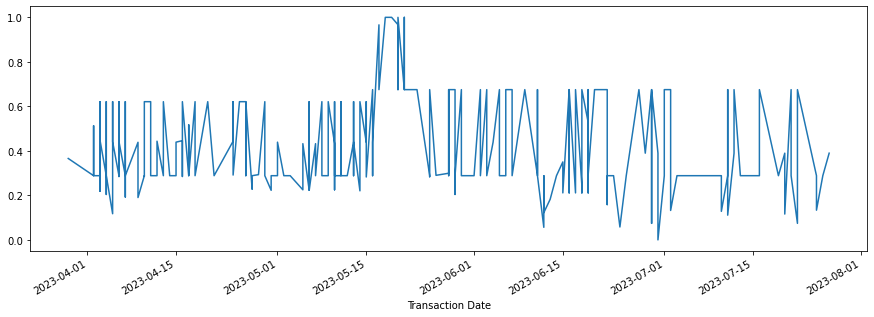

In [123]:
new_data['Cur Total'].plot(figsize=(15,5))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

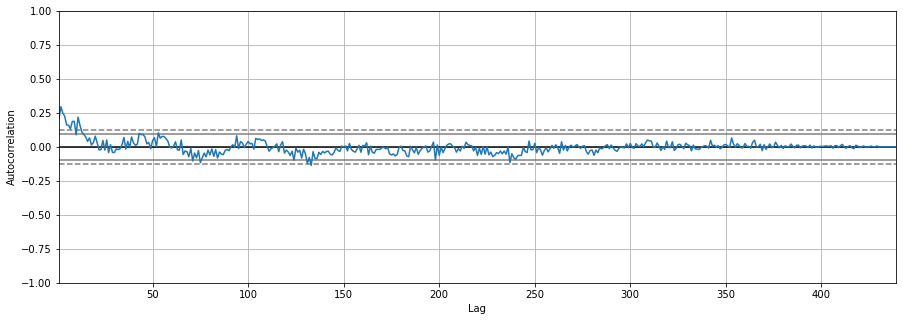

In [124]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
autocorrelation_plot(new_data['Cur Total'])

In [126]:
new_data.describe()

,Products,Cur Total
count,439.000000,439.000000
mean,1.018223,0.387900
std,0.223373,0.193808
min,0.000000,0.000000
25%,1.000000,0.288476
50%,1.000000,0.288476
75%,1.000000,0.621036
max,2.000000,1.000000


In [130]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(new_data['Cur Total'],new_data['Products'],test_size=0.2,random_state=50)
y_test

Transaction Date
2023-06-06    1
2023-06-30    2
2023-07-02    1
2023-05-06    1
2023-04-03    1
             ..
2023-07-05    1
2023-05-15    1
2023-06-17    1
2023-04-07    1
2023-05-03    1
Name: Products, Length: 88, dtype: int32

In [142]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred = dt.predict(np.array(x_test).reshape(-1,1))
y_pred

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[Text(253.63636363636363, 1009.5428571428572, 'X[0] <= 0.146\nentropy = 0.325\nsamples = 351\nvalue = [6, 334, 11]'),
 Text(101.45454545454545, 854.2285714285715, 'X[0] <= 0.057\nentropy = 1.415\nsamples = 18\nvalue = [3, 5, 10]'),
 Text(50.72727272727273, 698.9142857142858, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(152.1818181818182, 698.9142857142858, 'X[0] <= 0.117\nentropy = 1.485\nsamples = 10\nvalue = [3, 5, 2]'),
 Text(101.45454545454545, 543.6, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(202.9090909090909, 543.6, 'X[0] <= 0.12\nentropy = 1.459\nsamples = 6\nvalue = [3, 1, 2]'),
 Text(152.1818181818182, 388.28571428571433, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(253.63636363636363, 388.28571428571433, 'X[0] <= 0.125\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(202.9090909090909, 232.97142857142865, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(304.3636363636364, 232.97142857142865, 'X[0] <= 0.131\nentropy = 1.0\nsa

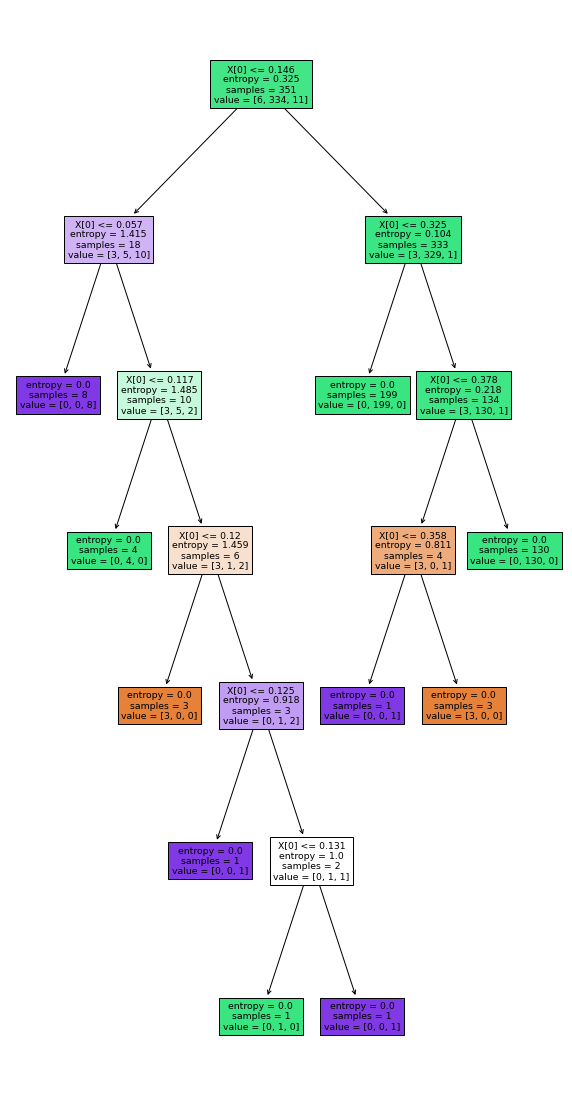

In [143]:
from sklearn import tree

plt.figure(figsize=(10,20))
tree.plot_tree(dt,filled=True)

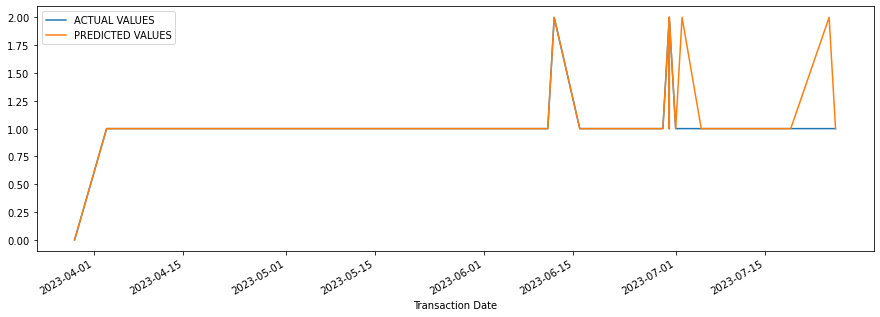

In [134]:
ng = {
    "ytest": y_test,
    "ypred": y_pred
}

newdf = pd.DataFrame(ng)
newdf.reset_index()
newdf.set_index(y_test.index)
newdf['ytest'].plot(figsize=(15,5),label="ACTUAL VALUES")
newdf['ypred'].plot(figsize=(15,5),label="PREDICTED VALUES")
plt.legend()

In [135]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
acc

0.9772727272727273

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.98      0.99        83
           2       0.67      1.00      0.80         4

    accuracy                           0.98        88
   macro avg       0.89      0.99      0.93        88
weighted avg       0.98      0.98      0.98        88

